### Sprint 11 - Aprenentatge no supervisat

#### - Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means


In [2]:
# import libraries
import pandas as pd 
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt 
from pandas import DataFrame
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_columns', None)
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
import kneed
from kneed import KneeLocator

In [194]:
# open dataset 
data = pd.read_csv('Publicacions Facebook Thailandia.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Veiem que les columnes Column1, column2, Column3 i Column4 només contenen NaN, així doncs les eliminarem del dataset.

Informació sobre cada columna:: 

+ status_id: id de la publicació.                   
+ status_type: Tipus de publicació.       
+ status_published: Data i hora de la publicació.  
+ num_reactions: Número de reaccions a la publicació.      
+ num_comments: Número de comentaris sobre la publicació.        
+ num_shares: Número de vegades que ha sigut compartida la publicació.          
+ num_likes: Número de likes de la publicació.           
+ num_loves: Número de loves de la publicació.           
+ num_wows: Número de wows de la publicació.             
+ num_haha: Número de hahas de la publicació.            
+ num_sads: Número de sads de la publicació.             
+ num_angrys: Número de angrys de la publicació.           

#### Preprocessat de les dades 

eliminarem les columnes que només contenen NaNs.

In [196]:
cols = ['Column1', 'Column2', 'Column3', 'Column4']
data.drop(cols, axis = 1, inplace= True)

In [197]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


A continuació convertirem les dades categòriques de la columna Status_type en numériques per poder treballar amb elles.
Això ho farem mitjançant la codificació one-hot que no estableix un ordre jearàrquic.

In [198]:
# Creem les noves columnes dummies
dummies = pd.get_dummies(data['status_type'], drop_first = True)
dummies.head()

,photo,status,video
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [199]:
# Afegim les noves columnes al DataFrame
data = pd.concat([data, dummies], axis = 1)

In [200]:
# Eliminems la columna original status_type
#  data = data.drop(columns=['status_type'])
data = data.drop(['status_type'], axis = 1)

In [201]:
data.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video
0,246675545449582_1649696485147474,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0,0,1
1,246675545449582_1649426988507757,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1,0,0
2,246675545449582_1648730588577397,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0,0,1
3,246675545449582_1648576705259452,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1,0,0
4,246675545449582_1645700502213739,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1,0,0


In [202]:
data['status'].value_counts()

0    6685
1     365
Name: status, dtype: int64

A continuació Transformarem les columnes published_data i published_time de format de data i hora a format numéric de manera que poguem treballar amb elles.

In [203]:
data['status_published'] =  pd.to_datetime(data['status_published'], format='%m/%d/%Y %H:%M')

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_published  7050 non-null   datetime64[ns]
 2   num_reactions     7050 non-null   int64         
 3   num_comments      7050 non-null   int64         
 4   num_shares        7050 non-null   int64         
 5   num_likes         7050 non-null   int64         
 6   num_loves         7050 non-null   int64         
 7   num_wows          7050 non-null   int64         
 8   num_hahas         7050 non-null   int64         
 9   num_sads          7050 non-null   int64         
 10  num_angrys        7050 non-null   int64         
 11  photo             7050 non-null   uint8         
 12  status            7050 non-null   uint8         
 13  video             7050 non-null   uint8         
dtypes: datetime64[ns](1), in

In [205]:
# converting the current date
# in datetime64 format

datetime64 = data['status_published']
 
'''# converting date time into second timestamp
ts = (date64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's')
 
print("Printing the converted datetime in Timestamp in seconds:", ts)
 
# converting date time into minute timestamp
tm = (date64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 'm')
 
print("Printing the converted datetime in Timestamp in minutes:", ts)'''
 
# converting date time into hour timestamp
th = (datetime64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 'h')
 
print("Printing the converted datetime in Timestamp in hour:", th)

# converting date time into minute timestamp
#tm = (time64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 'm')
 
#print("Printing the converted time in Timestamp in minutes:", tm)

Printing the converted datetime in Timestamp in hour: 0       423438.000000
1       423430.750000
2       423414.283333
3       423410.483333
4       423339.366667
            ...      
7045    409634.966667
7046    409619.316667
7047    409583.050000
7048    409536.716667
7049    409306.500000
Name: status_published, Length: 7050, dtype: float64


In [206]:
data['status_published'] = th

In [207]:
data.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video
0,246675545449582_1649696485147474,423438.000000,529,512,262,432,92,3,1,1,0,0,0,1
1,246675545449582_1649426988507757,423430.750000,150,0,0,150,0,0,0,0,0,1,0,0
2,246675545449582_1648730588577397,423414.283333,227,236,57,204,21,1,1,0,0,0,0,1
3,246675545449582_1648576705259452,423410.483333,111,0,0,111,0,0,0,0,0,1,0,0
4,246675545449582_1645700502213739,423339.366667,213,0,0,204,9,0,0,0,0,1,0,0


In [42]:
data['status_id']

0        246675545449582_1649696485147474
1        246675545449582_1649426988507757
2        246675545449582_1648730588577397
3        246675545449582_1648576705259452
4        246675545449582_1645700502213739
5        246675545449582_1645650162218773
6        246675545449582_1645564175560705
7        246675545449582_1644824665634656
8        246675545449582_1644655795651543
9        246675545449582_1638788379571618
10       246675545449582_1637655039684952
11       246675545449582_1636730006444122
12       246675545449582_1635846033199186
13       246675545449582_1635730986544024
14       246675545449582_1632874756829647
15       246675545449582_1628507150599741
16       246675545449582_1626584134125376
17       246675545449582_1622470701203386
18       246675545449582_1619188648198258
19       246675545449582_1617858078331315
20       246675545449582_1617109651739491
21       246675545449582_1617051285078661
22       246675545449582_1615645795219210
23       246675545449582_161562988

In [208]:
status = data["status_id"].str.split('_', expand=True)
status.columns = ['status_user_id', 'status_post_id']

In [209]:
data = pd.concat([status, data], axis=1)
data

,status_user_id,status_post_id,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video
0,246675545449582,1649696485147474,246675545449582_1649696485147474,423438.000000,529,512,262,432,92,3,1,1,0,0,0,1
1,246675545449582,1649426988507757,246675545449582_1649426988507757,423430.750000,150,0,0,150,0,0,0,0,0,1,0,0
2,246675545449582,1648730588577397,246675545449582_1648730588577397,423414.283333,227,236,57,204,21,1,1,0,0,0,0,1
3,246675545449582,1648576705259452,246675545449582_1648576705259452,423410.483333,111,0,0,111,0,0,0,0,0,1,0,0
4,246675545449582,1645700502213739,246675545449582_1645700502213739,423339.366667,213,0,0,204,9,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896,1061863470556065,1050855161656896_1061863470556065,409634.966667,89,0,0,89,0,0,0,0,0,1,0,0
7046,1050855161656896,1061334757275603,1050855161656896_1061334757275603,409619.316667,16,0,0,14,1,0,1,0,0,1,0,0
7047,1050855161656896,1060126464063099,1050855161656896_1060126464063099,409583.050000,2,0,0,1,1,0,0,0,0,1,0,0
7048,1050855161656896,1058663487542730,1050855161656896_1058663487542730,409536.716667,351,12,22,349,2,0,0,0,0,1,0,0


In [210]:
data = data.drop(['status_id'], axis = 1)

In [211]:
data.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video
0,246675545449582,1649696485147474,423438.000000,529,512,262,432,92,3,1,1,0,0,0,1
1,246675545449582,1649426988507757,423430.750000,150,0,0,150,0,0,0,0,0,1,0,0
2,246675545449582,1648730588577397,423414.283333,227,236,57,204,21,1,1,0,0,0,0,1
3,246675545449582,1648576705259452,423410.483333,111,0,0,111,0,0,0,0,0,1,0,0
4,246675545449582,1645700502213739,423339.366667,213,0,0,204,9,0,0,0,0,1,0,0


In [94]:
data['status_id'].value_counts()

819700534875473977201195792072      2
819700534875473974461939399331      2
819700534875473958291217683070      2
819700534875473995839410594917      2
819700534875473955793427932849      2
819700534875473988583821320476      2
819700534875473962799373898921      2
819700534875473966156923563166      2
819700534875473968264653352393      2
246675545449582429583263825475      2
819700534875473972433889602136      2
819700534875473955743124604546      2
819700534875473966629653515893      2
819700534875473954387151406810      2
819700534875473995218893990302      2
819700534875473993049450873913      2
819700534875473995933077252217      2
819700534875473956769714501887      2
819700534875473960320564146802      2
819700534875473976401089205416      2
819700534875473978746665637525      2
819700534875473984750728370452      2
819700534875473962061653972693      2
819700534875473964582740387251      2
246675545449582326883450762124      2
819700534875473999880033524188      2
819700534875

In [21]:
data[data['status_id']=='819700534875473974461939399331']

,status_user_id,status_post_id,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video
6193,819700534875473,974461939399331,819700534875473974461939399331,423463.433333,324,45,3,280,0,17,1,19,7,1,0,0
6244,819700534875473,974461939399331,819700534875473974461939399331,423463.433333,324,45,3,280,0,17,1,19,7,1,0,0


In [212]:
data = data.drop_duplicates()

In [213]:
data.count()

status_user_id      6999
status_post_id      6999
status_published    6999
num_reactions       6999
num_comments        6999
num_shares          6999
num_likes           6999
num_loves           6999
num_wows            6999
num_hahas           6999
num_sads            6999
num_angrys          6999
photo               6999
status              6999
video               6999
dtype: int64

In [114]:
#data.duplicated()

In [ ]:
#data[data['status_id']=='246675545449582326883450762124']

In [214]:
data['status_user_id'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: status_user_id, dtype: int64

In [215]:
data['status_user_id'] = pd.to_numeric(data['status_user_id'])
data['status_post_id'] = pd.to_numeric(data['status_post_id'])

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_user_id    6999 non-null   int64  
 1   status_post_id    6999 non-null   int64  
 2   status_published  6999 non-null   float64
 3   num_reactions     6999 non-null   int64  
 4   num_comments      6999 non-null   int64  
 5   num_shares        6999 non-null   int64  
 6   num_likes         6999 non-null   int64  
 7   num_loves         6999 non-null   int64  
 8   num_wows          6999 non-null   int64  
 9   num_hahas         6999 non-null   int64  
 10  num_sads          6999 non-null   int64  
 11  num_angrys        6999 non-null   int64  
 12  photo             6999 non-null   uint8  
 13  status            6999 non-null   uint8  
 14  video             6999 non-null   uint8  
dtypes: float64(1), int64(11), uint8(3)
memory usage: 731.3 KB


In [23]:
data.describe()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video
count,6.999000e+03,6.999000e+03,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,4.496236e+14,7.197095e+14,410914.306432,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159,0.606372,0.051293,0.333333
std,3.083144e+14,4.188569e+14,16639.320767,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582,0.488589,0.220611,0.471438
min,1.170599e+14,1.341166e+14,372866.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.466755e+14,2.711886e+14,404835.083333,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.466755e+14,7.269181e+14,419689.066667,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.148557e+14,9.295081e+14,422311.375000,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.050855e+15,1.653424e+15,424681.200000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000,1.000000


In [217]:
scaler = StandardScaler()

In [218]:
# transform data
scaled = scaler.fit_transform(data)

In [219]:
data_sc = DataFrame(scaled)

In [220]:
data_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.658297,2.220456,0.752710,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,-0.15999,-1.241157,-0.232522,1.414214
1,-0.658297,2.219813,0.752275,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0.805700,-0.232522,-0.707107
2,-0.658297,2.218150,0.751285,0.004428,0.011704,0.126793,-0.013530,0.205677,-0.028985,0.076069,-0.157059,-0.15999,-1.241157,-0.232522,1.414214
3,-0.658297,2.217783,0.751056,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0.805700,-0.232522,-0.707107
4,-0.658297,2.210915,0.746782,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999,0.805700,-0.232522,-0.707107


In [221]:
data_sc.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.08,-1.40,-2.29,-0.50,-0.25,-0.30,-0.48,-0.32,-0.14,-0.18,-0.16,-0.16,-1.24,-0.23,-0.71
25%,-0.66,-1.07,-0.37,-0.46,-0.25,-0.30,-0.44,-0.32,-0.14,-0.18,-0.16,-0.16,-1.24,-0.23,-0.71
50%,-0.66,0.02,0.53,-0.37,-0.25,-0.30,-0.35,-0.32,-0.14,-0.18,-0.16,-0.16,0.81,-0.23,-0.71
75%,0.54,0.50,0.68,-0.02,-0.23,-0.27,-0.06,-0.24,-0.14,-0.18,-0.16,-0.16,0.81,-0.23,1.41
max,1.95,2.23,0.83,9.90,23.26,25.63,10.24,16.06,31.72,39.36,34.28,44.86,0.81,4.30,1.41


In [222]:
scaler = MinMaxScaler()

In [223]:
# transform data
scaled = scaler.fit_transform(data_sc)

In [224]:
data_nm = DataFrame(scaled)

In [225]:
data_nm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,1.0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,1.0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0


In [226]:
data_nm.columns = ['status_user_id', 'status_post_id', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'photo', 'text', 'video']
data_nm.columns
data_nm.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,text,video
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,1.0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,1.0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0


In [227]:
data_nm.describe()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,text,video
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,0.356142,0.385434,0.734303,0.047770,0.010746,0.011758,0.044575,0.019409,0.004507,0.004446,0.004561,0.003554,0.606372,0.051293,0.333333
std,0.330173,0.275689,0.321133,0.096153,0.042532,0.038565,0.093323,0.061045,0.031387,0.025292,0.029041,0.022212,0.488589,0.220611,0.471438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.138805,0.090220,0.616976,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.138805,0.390179,0.903653,0.012314,0.000191,0.000000,0.012102,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.533089,0.523522,0.954263,0.045860,0.001048,0.001168,0.038641,0.004566,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

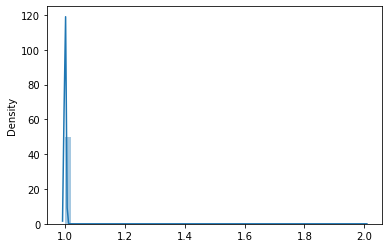

In [111]:
x_values = data["status_post_id"].value_counts().tolist()
sns.distplot(x_values)

<AxesSubplot:ylabel='Density'>

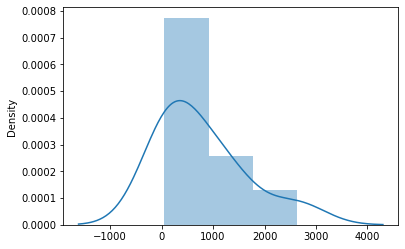

In [110]:
x_values = data["status_user_id"].value_counts().tolist()
sns.distplot(x_values)

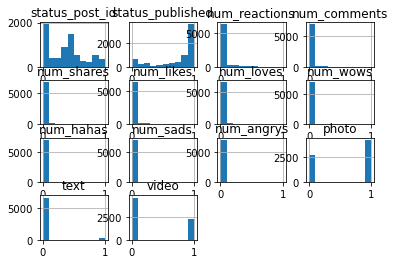

In [122]:
data_nm.drop(['status_user_id'],1).hist()
plt.show()

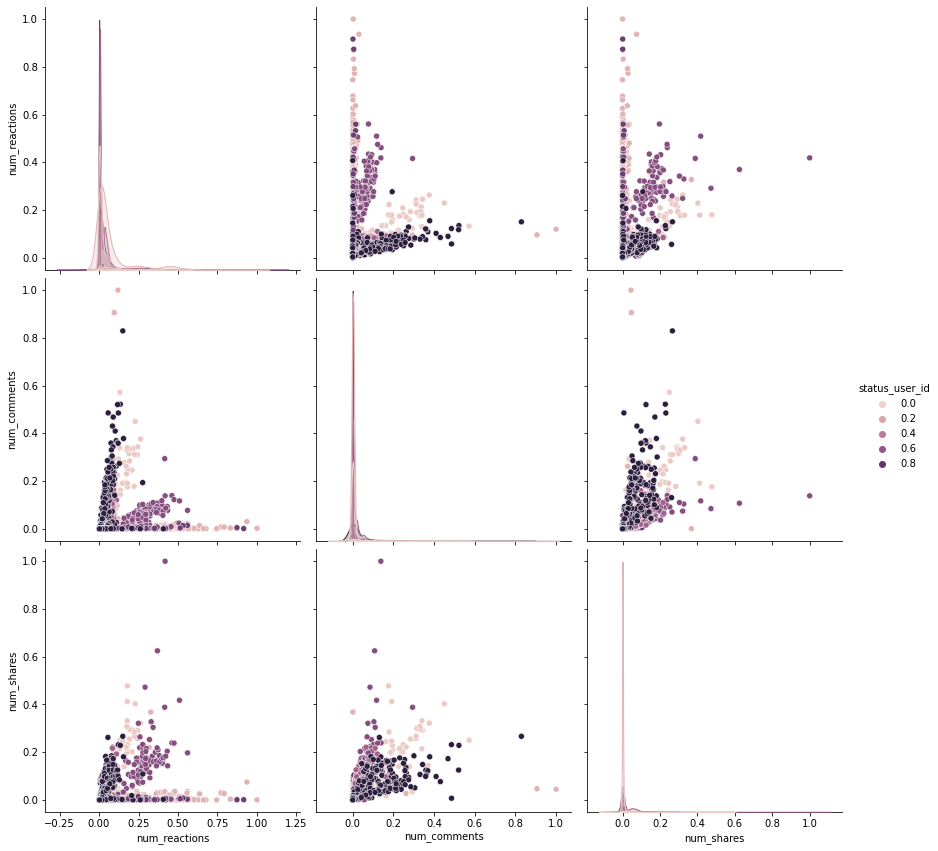

In [241]:
sns.pairplot(data_nm.dropna(), hue='status_user_id',size=4,vars=["num_reactions","num_comments","num_shares"],kind='scatter')

In [255]:
#X = np.array(data_nm[["num_reactions","num_comments","num_likes","video","photo","text"]])
X = np.array(data_nm[["num_reactions","num_comments","num_shares"]])
y = np.array(data_nm['status_user_id'])
X.shape

(6999, 3)

In [243]:
data_nm['status_user_id'].value_counts()

0.138805    2635
0.533089    1440
0.018265    1212
1.000000     778
0.783246     450
0.652092     252
0.031507     125
0.000000      56
0.752457      51
Name: status_user_id, dtype: int64

In [77]:
len(data_nm)

6999

In [82]:
len(X)

6999

TypeError: list indices must be integers or slices, not numpy.float64

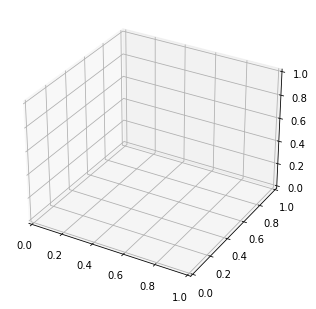

In [185]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

In [ ]:
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

### Model Building


#### K- means Clustering

Ara mirarem d'obtenir el número de clusters mitjançant el mètode elbow.

In [256]:
inertia = []
sse = {}
for n in range (1,12): 
    algorithm = KMeans(n_clusters= n, init = 'k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
    sse[n] = algorithm.inertia_

In [257]:
kn = KneeLocator(x=list(sse.keys()), 
             y=list(sse.values()), 
             curve='convex', 
             direction='decreasing')
print('Optimal k: ', round(kn.knee, 2))

Optimal k:  3


Ens indica que el número òptim de clusters serien 3. Veiem-ho en una gràfica.

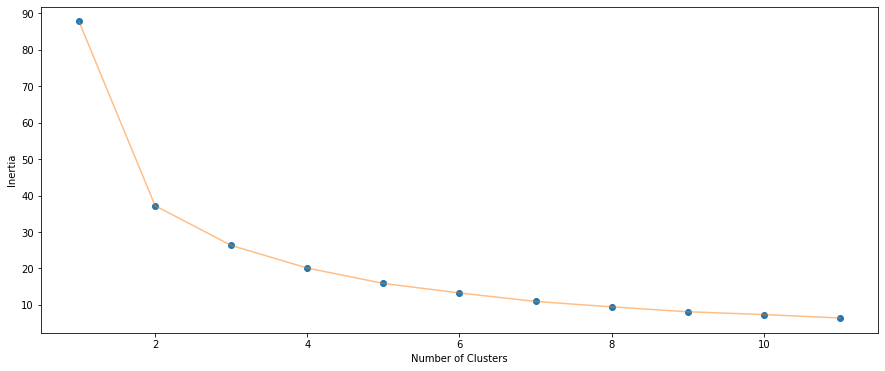

In [258]:
# elbow method 
plt.figure(1, figsize= (15,6))
plt.plot(np.arange(1 , 12) , inertia , 'o')
plt.plot(np.arange(1 , 12) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Comprovem que el número de clusters hauria de ser 3 perquè és on la corva s'aplana.

A continuació executem l'algoritme K-Means amb el número de clusters indicat.

In [259]:
kmeans3 = KMeans(n_clusters= 3, max_iter= 150, random_state= 42)
kmeans3.fit(X)

KMeans(max_iter=150, n_clusters=3, random_state=42)

In [260]:
centroids = kmeans3.cluster_centers_
print(centroids)

[[0.02320552 0.00451702 0.00622275]
 [0.10453727 0.2035487  0.14733117]
 [0.3621213  0.01405017 0.03000813]]


In [261]:
# generate a new column with the predicted clusters in a new dataset
clusters3 = data_nm.copy()
clusters3['Cluster_pred'] = kmeans3.fit_predict(X)

In [262]:
clusters3.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,text,video,Cluster_pred
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,1.0,0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,1.0,0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0


In [237]:
clusters3_dummies = pd.get_dummies(clusters3['Cluster_pred'],prefix='Cluster')
clusters3_dummies.head()

,Cluster_0,Cluster_1,Cluster_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [172]:
clusters3 = pd.concat([clusters3, clusters3_dummies], axis = 1)

In [263]:
clusters3.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,text,video,Cluster_pred
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,1.0,0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,1.0,0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0


In [ ]:
clusters3 = clusters3.drop(['Cluster_pred'], axis = 1)

In [279]:
clusters3.Cluster_pred.value_counts()

0    6342
2     460
1     197
Name: Cluster_pred, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


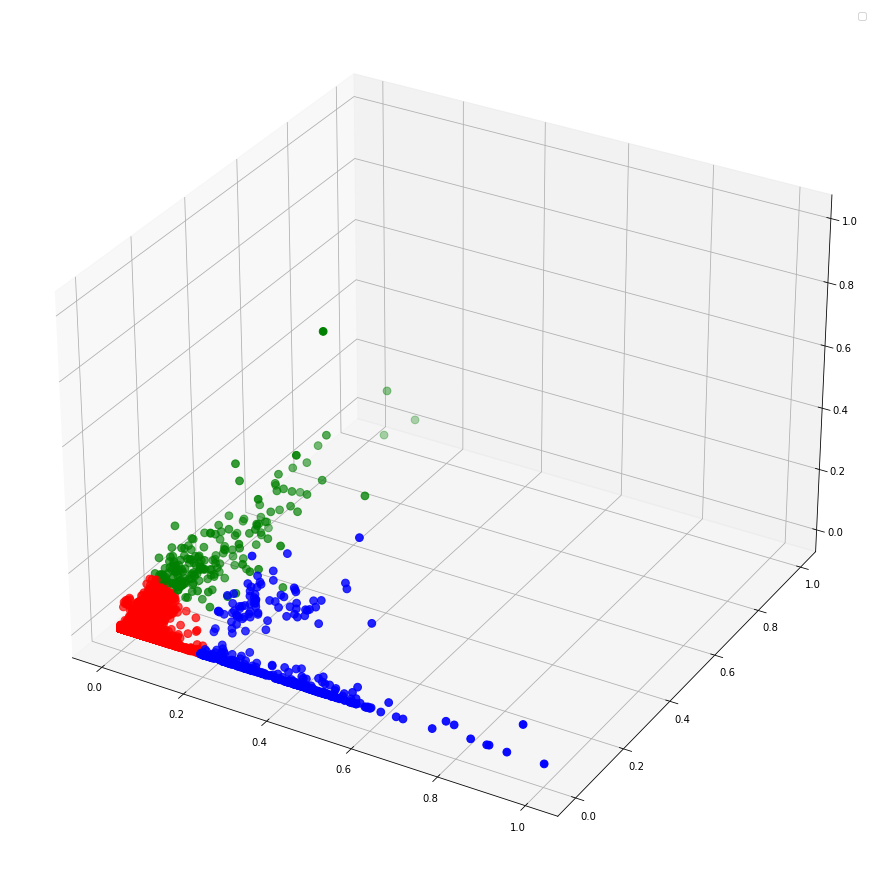

In [288]:
# Predicting the clusters
labels = kmeans3.predict(X)
# Getting the cluster centers
C = kmeans3.cluster_centers_

colores=['red','green','blue']

asignar=[]

for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure(figsize=(18, 12))

ax = Axes3D(fig)
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
#ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)



#add legend
plt.legend(handles=scatter.legend_elements()[0], labels = colores)

TypeError: __init__() got an unexpected keyword argument 'colors'

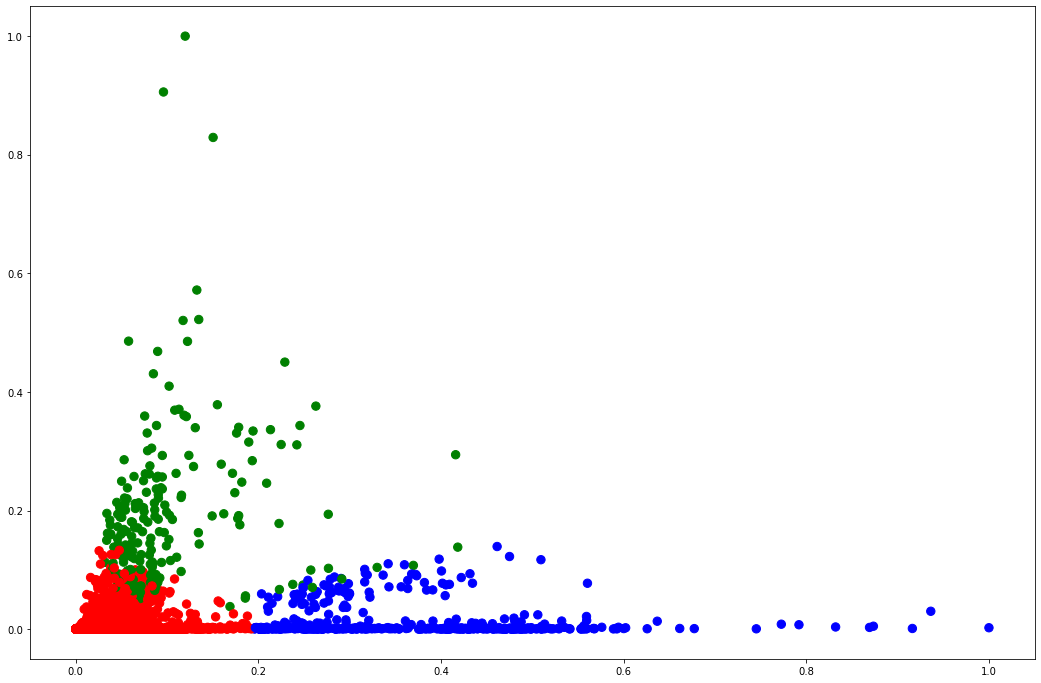

In [296]:
# Getting the values and plotting it
f1 = data_nm['num_reactions'].values
f2 = data_nm['num_comments'].values
fig = plt.figure(figsize=(18, 12))
scatter =  plt.scatter(f1, f2, c=asignar, s=70)
plt.legend(colors=['red','green','blue'] , labels = ['cluster_0', 'cluster_1','cluster_2'])
plt.show()




We see that the size of the clusters is not equal. We can also add our predictions to our pca_df to check how it looks like: 

We can see the distribution of the clusters between the 3 components of PCA. We see that cluster 2, despite being the smallest in number of observations, is the one that appears to be the largest. This may be due to the fact that its observations are more dispersed. When we do the statistical analysis of each cluster we will be able to confirm this. 

Sometimes it is easier to visualize in 2 dimensions so we can plot the PCA components in two dimensions: PCA1 and PCA2 and on the other side PCA1 and PCA3.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


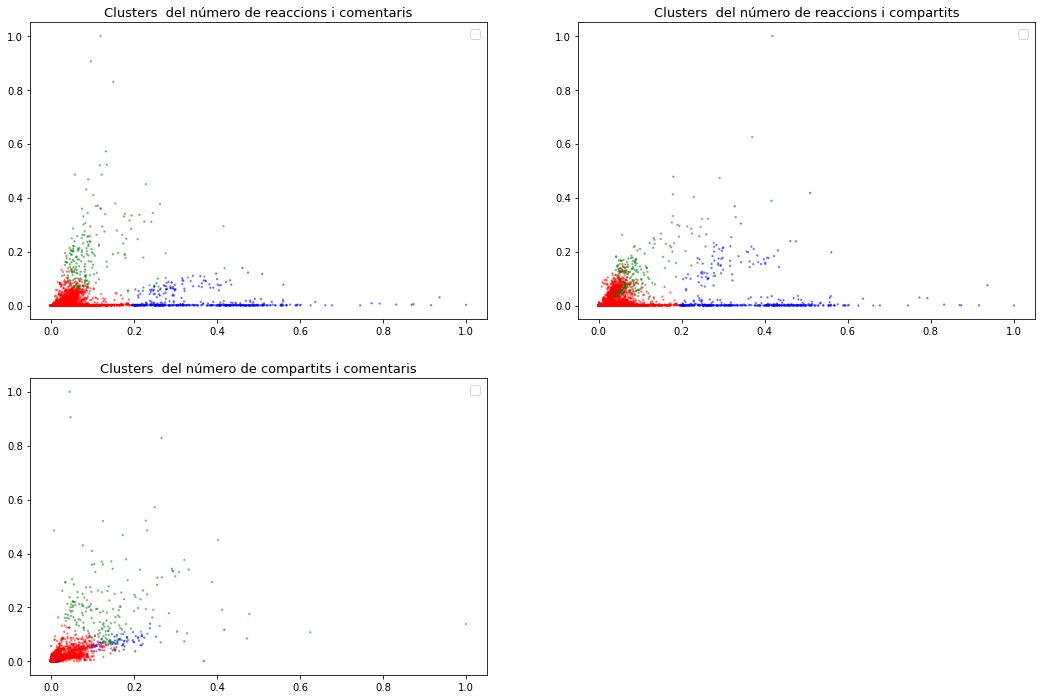

In [273]:
# Scatter plot on Principal components to visualize the spread of the data
fig = plt.figure(figsize=(18,12))

plt.subplot(221)
plot2 = plt.scatter(x = data_nm['num_reactions'], y = data_nm['num_comments'], c= asignar , alpha = 0.4 , s= 2)
plt.legend(handles = plot2.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i comentaris', fontsize = 13)

plt.subplot(222)
plot3 = plt.scatter(x = data_nm['num_reactions'], y = data_nm['num_shares'], c= asignar , alpha = 0.4, s = 2 )
plt.legend(handles = plot3.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i compartits', fontsize = 13)

plt.subplot(223)
plot4 = plt.scatter(x = data_nm['num_shares'], y = data_nm['num_comments'], c= asignar , alpha = 0.4 , s= 2)
plt.legend(handles = plot4.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de compartits i comentaris', fontsize = 13)




plt.show()

Looking at this, we see that the clusters appear well defined, especially in the PCA1 vs PCA2 plot. In fact, cluster 0 has many more observations than the other two but seems smaller because the data is much more concentrated. 

#### Summary statistics for each cluster

Let's review the summary statistics for each cluster to see the differences: 

In [80]:
# describe of each cluster: 
clusters3[clusters3['Cluster_pred'] == 0].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,Cluster_pred
count,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.00,1381518.0
mean,26.58,28.77,-2.19,81.38,542.28,14.83,6.10,15.74,3.97,0.0
std,24.86,22.72,12.56,35.00,285.07,4.29,3.48,8.76,1.99,0.0
min,-109.00,0.00,-181.00,0.00,0.00,0.00,1.00,1.00,1.00,0.0
25%,8.00,11.00,-10.00,53.00,304.00,12.00,3.00,8.00,2.00,0.0
50%,20.00,21.00,-4.00,77.00,503.00,15.00,6.00,16.00,4.00,0.0
75%,41.00,40.00,3.00,108.00,761.00,18.00,9.00,23.00,6.00,0.0
max,100.00,213.00,90.00,200.00,1593.00,24.00,12.00,31.00,7.00,0.0


In [81]:
clusters3[clusters3['Cluster_pred'] == 1].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,Cluster_pred
count,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.00,329326.0
mean,28.09,31.61,-3.51,226.60,1765.73,14.19,6.13,15.73,4.01,1.0
std,33.74,29.81,17.87,59.55,499.49,4.80,3.42,8.77,2.00,0.0
min,-70.00,6.00,-101.00,125.00,867.00,0.00,1.00,1.00,1.00,1.0
25%,5.00,11.00,-15.00,180.00,1391.00,11.00,3.00,8.00,2.00,1.0
50%,20.00,20.00,-5.00,213.00,1642.00,14.00,6.00,16.00,4.00,1.0
75%,44.00,42.00,5.00,263.00,2116.00,18.00,9.00,23.00,6.00,1.0
max,327.00,333.00,212.00,664.00,4962.00,24.00,12.00,31.00,7.00,1.0


In [82]:
clusters3[clusters3['Cluster_pred'] == 2].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,Cluster_pred
count,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.00,218160.0
mean,162.27,150.97,11.30,99.67,662.09,16.37,6.13,15.88,4.02,2.0
std,81.34,85.68,31.23,52.74,430.28,5.07,3.56,8.91,2.03,0.0
min,87.00,6.00,-151.00,0.00,11.00,0.00,1.00,1.00,1.00,2.0
25%,113.00,105.00,-7.00,60.00,334.00,14.00,3.00,8.00,2.00,2.0
50%,139.00,132.00,3.00,90.00,589.00,17.00,6.00,16.00,4.00,2.0
75%,184.00,177.00,20.00,129.00,892.00,20.00,9.00,23.00,6.00,2.0
max,2461.00,2467.00,759.00,1091.00,4962.00,24.00,12.00,31.00,7.00,2.0


In [83]:
clusters3[clusters3['Cluster_pred'] == 0]['CancellationCode'].value_counts()

Not Cancelled               1380885
Weather                         307
Carrier                         246
National Airspace System         80
Name: CancellationCode, dtype: int64

In [84]:
clusters3[clusters3['Cluster_pred'] == 1]['CancellationCode'].value_counts()

Not Cancelled    329326
Name: CancellationCode, dtype: int64

In [85]:
clusters3[clusters3['Cluster_pred'] == 2]['CancellationCode'].value_counts()

Not Cancelled    218160
Name: CancellationCode, dtype: int64

In [86]:
clusters3[clusters3['Cluster_pred'] == 0]['DelayReason'].value_counts(normalize= True)

Delay below 15 (unknown reason)    0.393051
LateAircraftDelay                  0.267226
CarrierDelay                       0.202047
NASDelay                           0.110702
WeatherDelay                       0.025415
SecurityDelay                      0.001558
Name: DelayReason, dtype: float64

In [87]:
clusters3[clusters3['Cluster_pred'] == 1]['DelayReason'].value_counts(normalize= True)

Delay below 15 (unknown reason)    0.420583
LateAircraftDelay                  0.213645
CarrierDelay                       0.200543
NASDelay                           0.146466
WeatherDelay                       0.016859
SecurityDelay                      0.001904
Name: DelayReason, dtype: float64

In [88]:
clusters3[clusters3['Cluster_pred'] == 2]['DelayReason'].value_counts(normalize= True)

LateAircraftDelay    0.433049
CarrierDelay         0.266236
NASDelay             0.229112
WeatherDelay         0.071122
SecurityDelay        0.000481
Name: DelayReason, dtype: float64

In [45]:
clusters3['Cluster_pred'].value_counts(normalize = True)

0    0.716182
1    0.170723
2    0.113095
Name: Cluster_pred, dtype: float64

Looking at this we are already able to define some characteristics of each cluster: 

#### Cluster 0: 

+ It is the group with by far the most observations (72 % of flights). 
+ The average delay time is low. Half of the flights are less than 20 minutes late. 
+ ElapsedDelay is negative, meaning that the flight time is less than expected. 
+ These are short/medium haul flights (average 542 miles per flight and 81 minutes flight time). 
+ All cancelled flights are included in this group. 


#### Cluster 1: 

+ This group is smaller than the previous one  (17% of flghts) 
+ Delay time is also low. 
+ ElpasedDelay is also negative
+ The main difference with the previous cluster is that this one includes medium/long distance flights. The average flight time is 227 minutes and the distance 1766 miles. 
+ We have no cancelled flights in this group.  


#### Cluster 2: 

+ This is the smallest group (11% of flights).
+ These are flights with a very high delay time (the average delay of these flights is 162 minutes!!!) The flight with the minimum delay has a delay of 87 minutes. 
+ On average these are short/medium distance flights, but a little longer than in cluster 0. 
+ The leading reason for delays on these flights is 'LateAircraftDelay' (43% of times), followed by 'Carrierdelay' (26% of times).
+ The departure time is higher than in the other clusters, which may mean that these flights tend to accumulate more as the day progresses. 

#### Graphical analysis

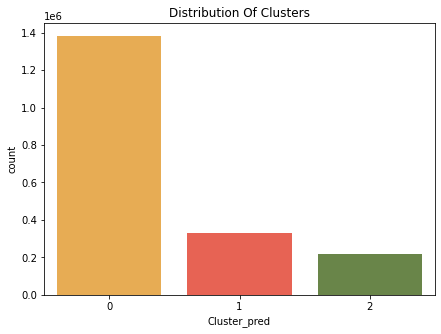

In [89]:
#Plotting countplot of clusters
plt.figure(figsize = (7,5))
pal = ['#ffb13c', '#ff503c', '#698f3f']
pl = sns.countplot(x=clusters3['Cluster_pred'], palette= pal)
pl.set_title("Distribution Of Clusters")
plt.show()

As we have already seen, the division of clusters has not been done in an equitable manner. 

#### Analizing numerical features

First we will do some boxplots of the most important numerical variables: 

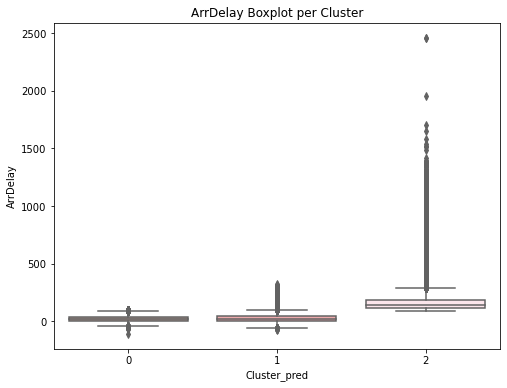

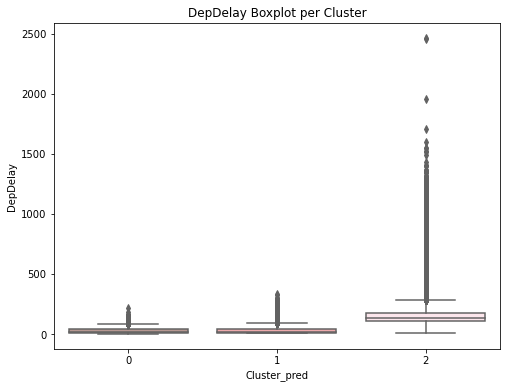

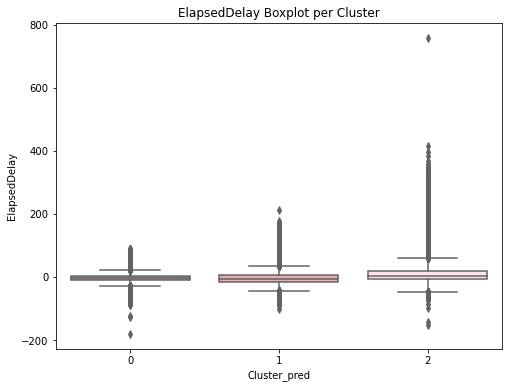

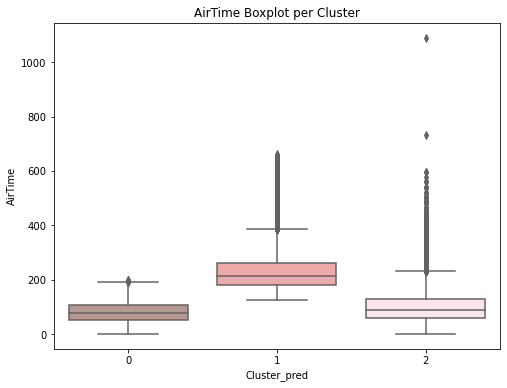

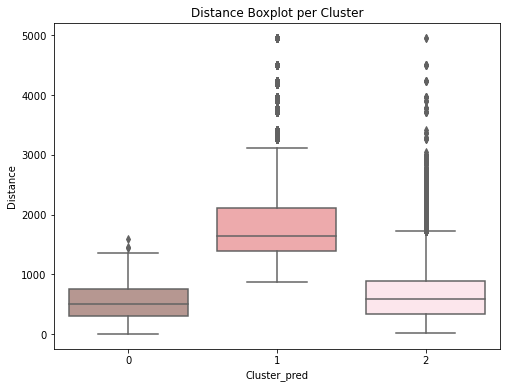

In [90]:
# list of features we are going to evaluate 
list = ['ArrDelay', 'DepDelay', 'ElapsedDelay', 'AirTime', 'Distance']

for i in list: 
    plt.figure(figsize = (8,6))
    sns.boxplot(x =clusters3['Cluster_pred'], y = clusters3[i], palette = ['#bc938b', '#f89fa1', '#ffe3eb'] )
    plt.title("{} Boxplot per Cluster".format(i),fontsize=12)
    plt.show()

The boxplots more or less confirm what we have already seen: 

+ ArrDelay : We see that in cluster 0 and 1 we have few outliers and the data is concentrated around the mean. For these clusters (0 and 1) we have outliers of positive and negative values. In cluster 2 we observe that we have many outliers, but all of them are for positive values. 


+ DepDelay: Similar to ArrDelay but without negative outliers in clusters 0 and 1.  


+ ElapsedDelay : We have both positive and negative outliers in all clusters, but these are much larger in the case of cluster 2. 


+ AirTime/Distance : we can clearly see the differences between cluster 0 and cluster 1 (the former has shorter flights). It can also be seen that cluster 2 has flights of all types, short and long distance. 

We will now look at how these variables are distributed: 


<Figure size 576x360 with 0 Axes>

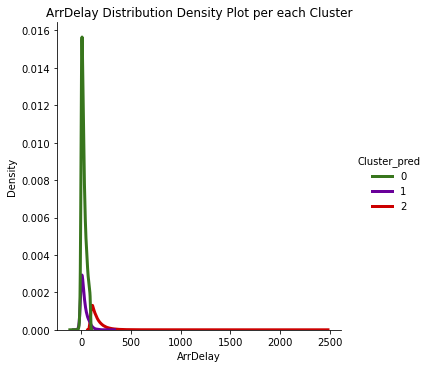

<Figure size 576x360 with 0 Axes>

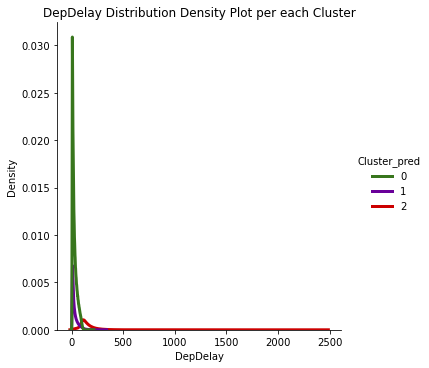

<Figure size 576x360 with 0 Axes>

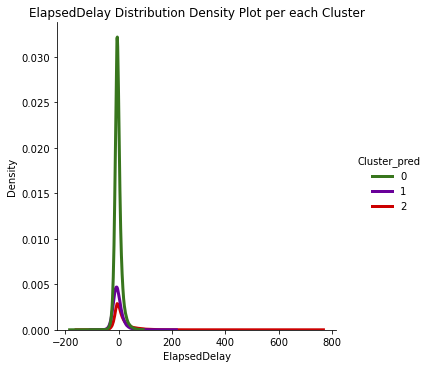

<Figure size 576x360 with 0 Axes>

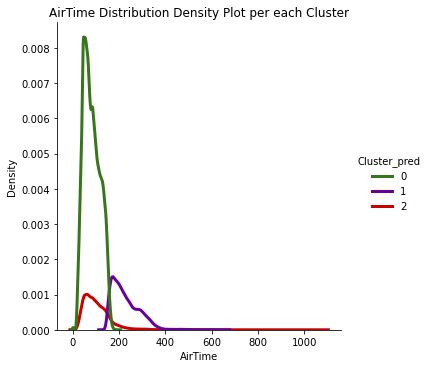

<Figure size 576x360 with 0 Axes>

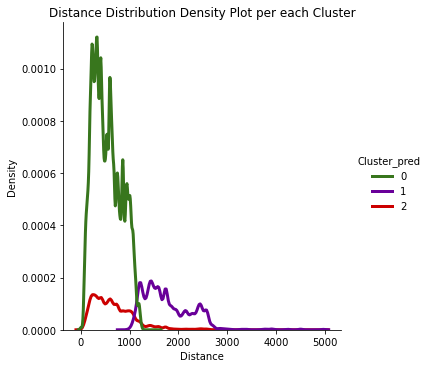

In [91]:
for i in list: 
    plt.figure(figsize = (8,5))
    sns.displot(x =clusters3[i], hue = clusters3['Cluster_pred'], kind = 'kde', 
                palette = ['#38761d', '#690099', '#cc0000'], linewidth = 3)
    plt.title("{} Distribution Density Plot per each Cluster".format(i),fontsize=12)
    plt.show()

+ ArrDelay and DepDelay : Clusters 0 and 1 are concentrated at lower values. Cluster 2 has a marked right skewed distribution and ranges over very high values.  


+ ElapsedDelay : the three groups have a similar distribution, but group 2 has more extreme values in the positive values. 


+ AirTime/Distance : we can clearly see the differences between each cluster. Cluster 0 are short flights, cluster 1 long flights and cluster 2 a mix of both (although it has more short flights as well). 


We can also make some scatterplots to see if we can locate the clusters in relation to two variables: 

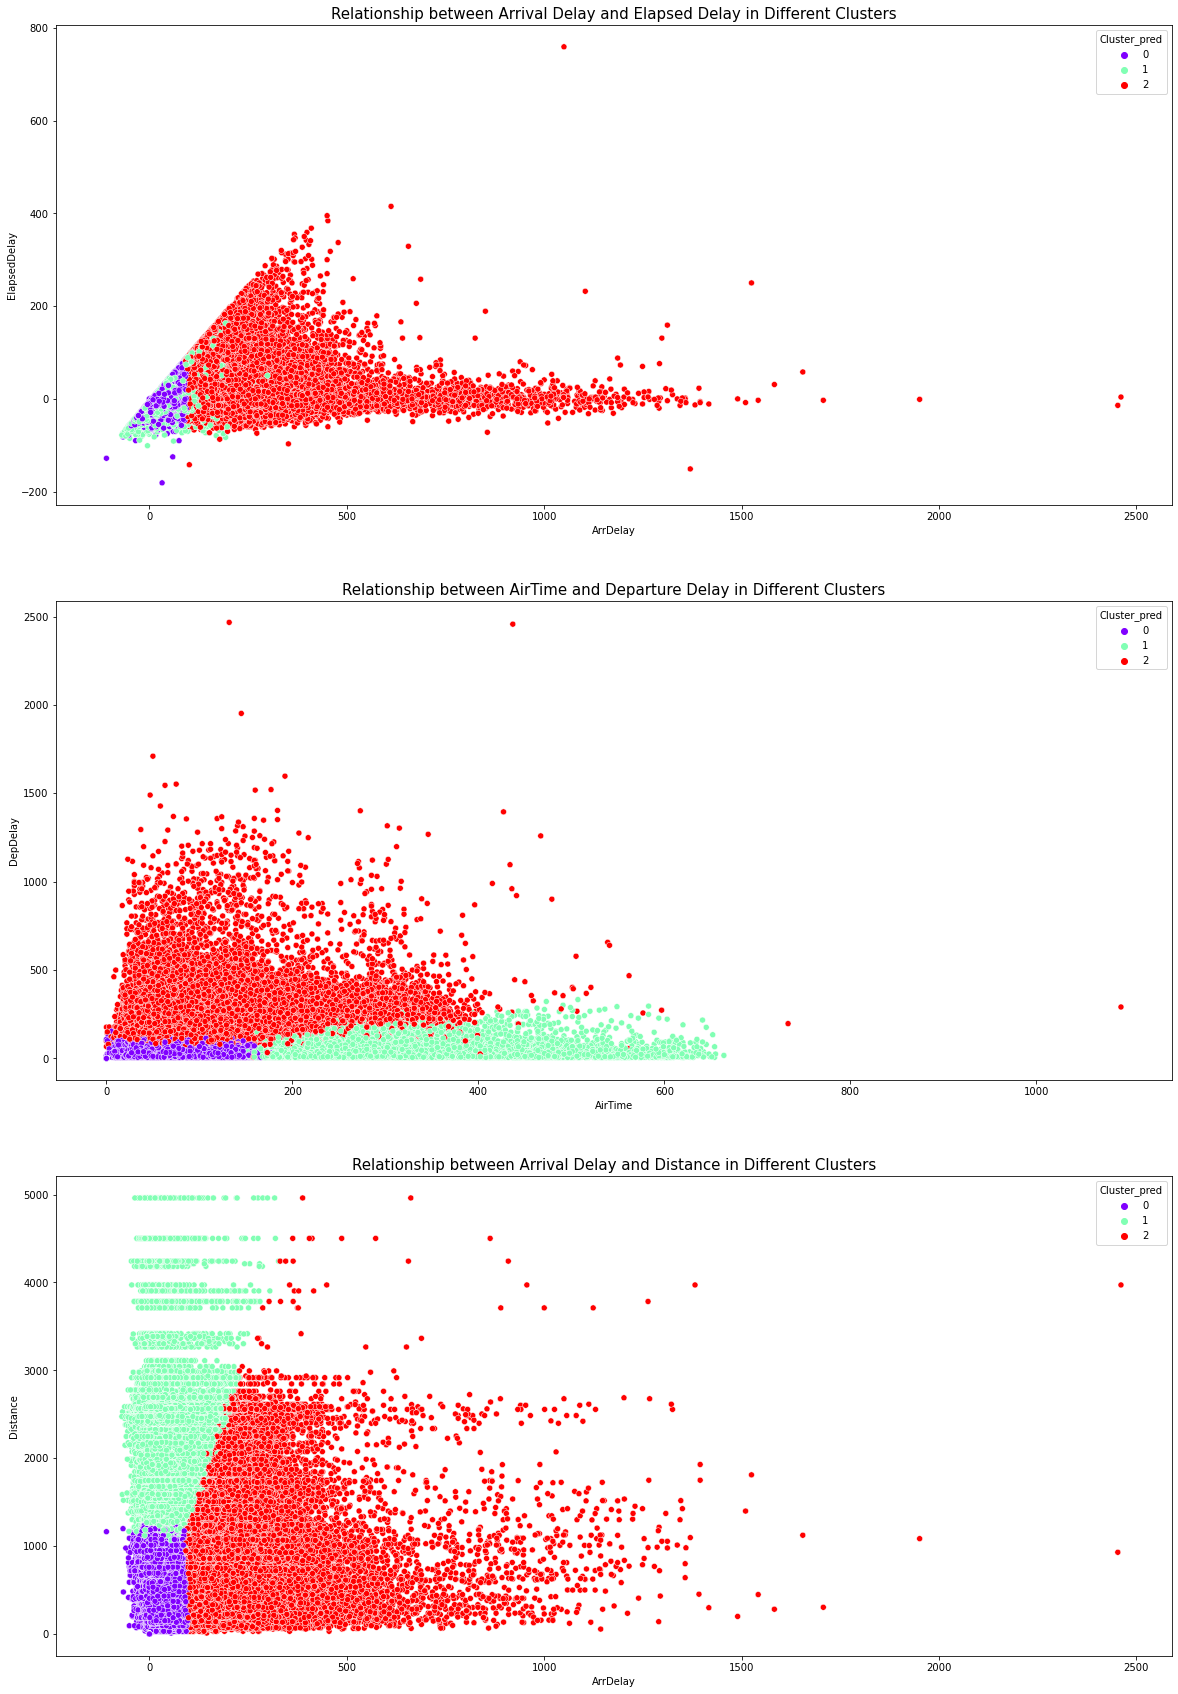

In [92]:
# some scatterplots 
plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'ArrDelay', y = 'ElapsedDelay',hue='Cluster_pred',data = clusters3,legend='full',palette="rainbow")
plt.title('Relationship between Arrival Delay and Elapsed Delay in Different Clusters', fontsize = 15)
plt.subplot(3,1,2)
sns.scatterplot(x = 'AirTime', y = 'DepDelay',hue='Cluster_pred', data = clusters3,legend='full',palette="rainbow")
plt.title('Relationship between AirTime and Departure Delay in Different Clusters', fontsize = 15)
plt.subplot(3,1,3)
sns.scatterplot(x = 'ArrDelay', y = 'Distance',hue='Cluster_pred', data=clusters3,legend='full',palette="rainbow")
plt.title('Relationship between Arrival Delay and Distance in Different Clusters', fontsize = 15)
plt.show()

+ We notice that in the three scatterplots, cluster 2 seems to be the largest and cluster 0 the smallest, this may be because the data from cluster 0 is much more concentrated and in cluster 2 is more scattered.

+ The groups seem very well defined, especially in the scatterplot between Distance and ArrDelay. 

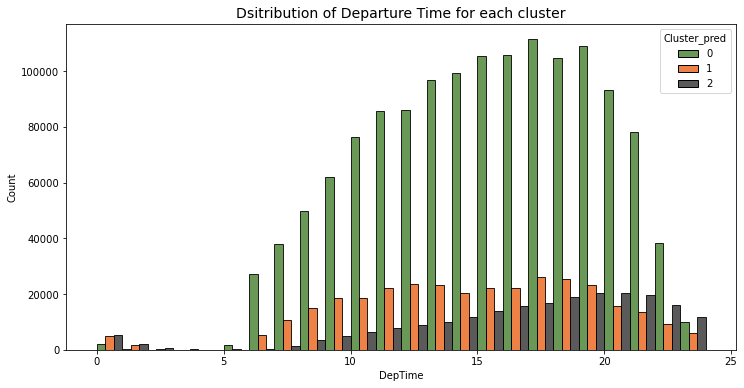

In [126]:
plt.figure(figsize=(12,6))
range_bin_width = range(0, 25, 1)
sns.histplot(x =clusters3['DepTime'], hue = clusters3['Cluster_pred'], bins= range_bin_width, multiple = 'dodge',  
            palette = ['#38761d', '#e85708', '#232323'])
plt.title('Dsitribution of Departure Time for each cluster', fontsize = 14); 

Looking at the distribution of the departure times of the flights of each cluster, it seems evident that the flights that have more delays tend to increase as the day progresses (early in the day there are hardly any flights of this type).In fact, at the end of the day we see that the proportion of flights with high delay (cluster 2) is higher than for the other clusters.  

#### Plot categorical features in each cluster

Let's now look at the categorical variables and their relationship with each cluster. First we will look at Delay Reasons: 

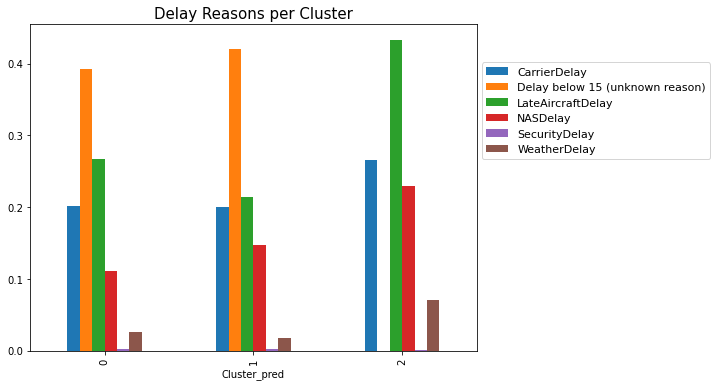

In [94]:
reasons_percent = clusters3.groupby('Cluster_pred')['DelayReason'].value_counts(normalize = True)
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Delay Reasons per Cluster', fontsize = 15); 

+ Cluster 0 and cluster 1 : Most common reason is 'Delay below 15' minutes. 
+ Cluster 2 : most common reason is LateAircraftDelay, folowed by CarrierDelay. 

We only have cancelled flights in cluster 0, we can review the cancellation reasons for this group: 

In [95]:
clusters3[clusters3['Cluster_pred'] == 0]['CancellationCode'].value_counts()

Not Cancelled               1380885
Weather                         307
Carrier                         246
National Airspace System         80
Name: CancellationCode, dtype: int64

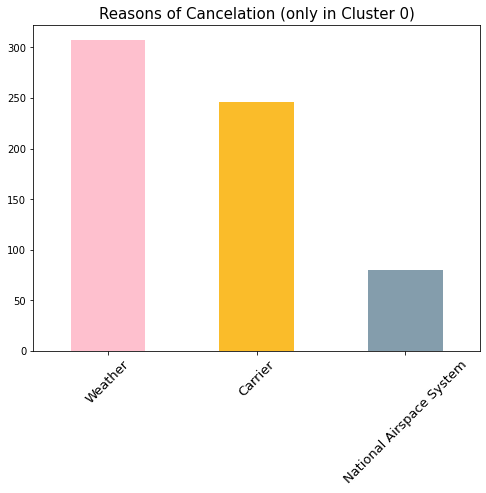

In [96]:
# reasons of cancellation (only for cluster 0)
canc = clusters3[clusters3['CancellationCode'] != 'Not Cancelled']['CancellationCode'].value_counts()
canc.plot(kind= 'bar', figsize = (8,6), color = ['#fec0ce', '#fabc2a','#849dac'])
plt.title('Reasons of Cancelation (only in Cluster 0)', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 13); 

We see that the main reason for cancellation is Weather, followed by Carrier and National Airspace System. 


We can also review the relationship that each Carrier has with the clusters, in particular, it would be interesting to see the **percentage of flights of each cluster for each Carrier.**

In [97]:
# do the percentage of each cluster for each carrier 
carriers_percent = clusters3.groupby('UniqueCarrier')['Cluster_pred'].value_counts(normalize = True)
carriers_percent = carriers_percent.unstack()
carriers_percent

Cluster_pred,0,1,2
UniqueCarrier,,,
9E,0.859589,0.002363,0.138048
AA,0.537003,0.341429,0.121567
AQ,0.677419,0.299731,0.022849
AS,0.700879,0.219497,0.079624
B6,0.541130,0.289233,0.169637
CO,0.428791,0.463270,0.107939
DL,0.621904,0.277075,0.101021
EV,0.855351,0.000966,0.143683
F9,0.808829,0.144406,0.046765


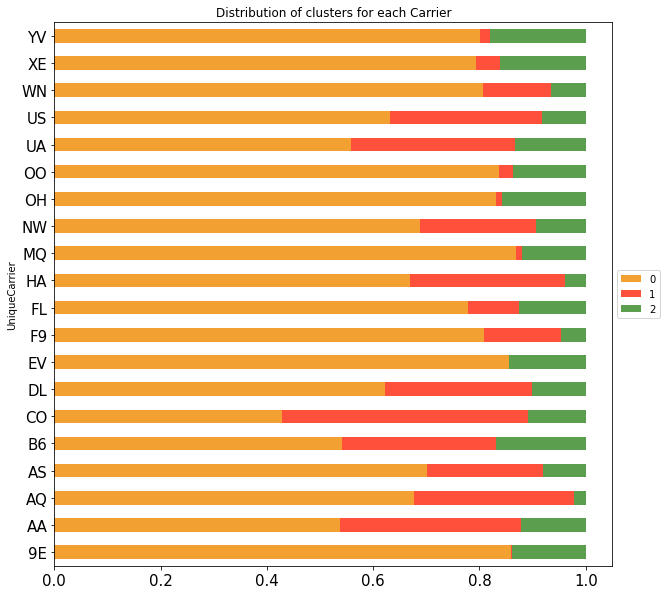

In [98]:
carriers_percent.plot( kind = 'barh', stacked = True, mark_right = True, 
                     title = 'Distribution of clusters for each Carrier', fontsize = 15, 
                     figsize = (10,10), color = [ '#f1a031', '#ff503c', '#5b9e4d',])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); 

As we know the characteristics of each cluster, we can draw conclusions about each Carrier only by knowing the portion of each cluster it has: 

+ The higher the percentage of green line, the longer the average delay time of that Carrier.
+ If the green line is small, the shorter the average delay time for that company. 
+ If the orange line is larger, it means that the company operates more short-haul flights. 
+ If the red line is relatively long, it means that the company will have longer flights. 

Specific examples:

+ The average delay time for AQ is small. 
+ 9E operates mostly short-haul flights.  
+ CO is a Carrier that has longer than average flight durations.  
+ YV is a Carrier that has a high delay time compared to the average. 

If we want to check if these conclusions are true: 

In [99]:
arr_delay = clusters3['ArrDelay'].mean()
AQ_arrdelay = clusters3[clusters3['UniqueCarrier'] == 'AQ']['ArrDelay'].mean()

print('Average Arrival Delay for AQ Carrier: ', round(AQ_arrdelay, 2))
print('Average Arrival Delay for all flights: ', round(arr_delay, 2))

Average Arrival Delay for AQ Carrier:  21.26
Average Arrival Delay for all flights:  42.19


In [100]:
distance_9E = clusters3[clusters3['UniqueCarrier'] == '9E']['Distance'].mean()
distance = clusters3['Distance'].mean()

print('Average distance for 9E Carrier: ', round(distance_9E, 2))
print('Average distance for all the flights:  ', round(distance, 2))

Average distance for 9E Carrier:  463.37
Average distance for all the flights:   764.7


In [101]:
distance_CO = clusters3[clusters3['UniqueCarrier'] == 'CO']['Distance'].mean()


print('Average distance for CO Carrier: ', round(distance_CO, 2))
print('Average distance for all the flights:  ', round(distance, 2))

Average distance for CO Carrier:  1238.54
Average distance for all the flights:   764.7


In [102]:
YV_arrdelay = clusters3[clusters3['UniqueCarrier'] == 'YV']['ArrDelay'].mean()

print('Average Arrival Delay for YV Carrier: ', round(YV_arrdelay, 2))
print('Average Arrival Delay for all flights: ', round(arr_delay, 2))

Average Arrival Delay for YV Carrier:  55.24
Average Arrival Delay for all flights:  42.19


The advantage of clusters in this case is that by knowing the characteristics of each clusters, we can look at the plot and know the strengths of each Carrier and what measures can be taken to make improvements. 

Lastly, we can evaluate the proprortion of flights of each cluster for each month of the year (we could do that also for DayOfWeek and DayOfMonth but the results are not so significative). 

In [103]:
clrs = ['#fdcb29', '#c06378', '#94b0b7']

months_percent = clusters3.groupby('Month')['Cluster_pred'].value_counts(normalize = True)
#day_percent = clusters3.groupby('DayOfWeek')['Cluster_pred'].value_counts(normalize = True)
#day_month_percent = clusters3.groupby('DayofMonth')['Cluster_pred'].value_counts(normalize = True)

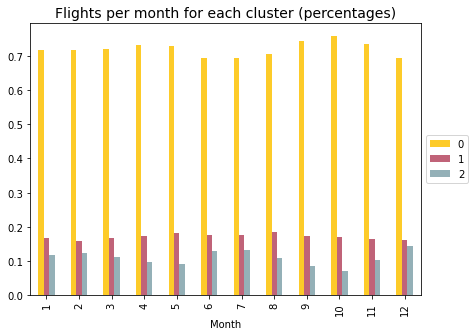

In [104]:
months_percent.unstack(fill_value=0).plot( figsize = (7,5),  kind = 'bar', color = clrs)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Flights per month for each cluster (percentages)', fontsize = 14); 

Looking at the graph and how the clusters are distributed in different months, we can conclude that July and December are the months with the highest average delay (cluster 2 is larger in these months than in the rest).